#### GUIDING QUESTION:

following Cai's 2020 paper that uses TA-DIC as a proxy for OA, we consider the TA-DIC and OA space in our ocean

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [4]:
import arrow
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.patches import Rectangle
import pickle
from cmocean import cm
import warnings
import netCDF4 as nc
import sys
sys.path.append('../pyscripts/bylayer_extract/')
import extract_bylayer_mean_BOXMASK as ebmBOX 
from importlib import reload
from salishsea_tools import viz_tools

%matplotlib inline
warnings.simplefilter('ignore')

plt.rcParams.update({'font.size': 13,
                     'xtick.labelsize' : 13,
                     'ytick.labelsize' : 13})

### [A] Map definition and station definition

In [5]:
# jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
# jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
# jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

# cs_x = 250; cs_y = 500; cs_col = 'royalblue'
# cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
# cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


# w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
# pco2 = w['model_output']['pCO2'][:]
# pco2[pco2>2e5] = np.nan
# pco2[pco2<2000] = 500
# fact = 1.5
# fig = plt.figure(figsize=(12*fact,6.5*fact))

# ax0 = fig.add_subplot(1,2,1)
# #toba and bute

# im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
# viz_tools.set_aspect(ax0)
# #jdf
# rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
# ax0.add_patch(rect_jdf)
# rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
# ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

# rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
# ax0.add_patch(rect_cs)
# rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
# ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)

# ax0.set_title('individual stations')



Text(0.5, 1.0, 'individual stations')

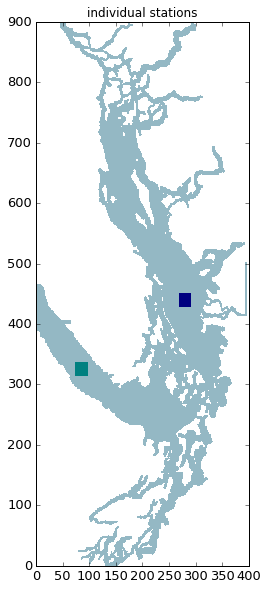

In [6]:
jdf_x = 85; jdf_y = 325; jdf_col = 'teal'
#jdf2_x = 50; jdf2_y = 370; jdf2_col = 'mediumaquamarine'
#jdf3_x = 130; jdf3_y = 290; jdf3_col = 'lightseagreen'

#cs_x = 250; cs_y = 500; cs_col = 'royalblue'
cs2_x = 280; cs2_y = 440; cs2_col = 'navy'
#cs3_x = 220; cs3_y = 540; cs3_col = 'dodgerblue'

# haro_x = 230; haro_y = 310; haro_col = 'tomato'
# haro2_x = 340; haro2_y = 290; haro2_col = 'firebrick'
# haro3_x = 260; haro3_y = 335; haro3_col = 'indianred'


# ns_x = 160; ns_y = 680; ns_col = 'olive'
# ns2_x = 150; ns2_y = 640; ns2_col = 'yellowgreen'
# ns3_x = 155; ns3_y = 710; ns3_col = 'palegoldenrod'


w = nc.Dataset('/data/tjarniko/results/hindcast.201905_dayavg_OmA-pH-pCO2/OmA_plus_20070104.nc')
pco2 = w['model_output']['pCO2'][:]
pco2[pco2>2e5] = np.nan
pco2[pco2<2000] = 500
fact = 1.5
fig = plt.figure(figsize=(12*fact,6.5*fact))

ax0 = fig.add_subplot(1,2,1)
#toba and bute

im = ax0.pcolormesh(pco2, cmap=cm.balance_r, vmin = 0, vmax = 800)
viz_tools.set_aspect(ax0)
#jdf
rect_jdf = Rectangle((jdf_x-10,jdf_y-10),20,20,linewidth=2,edgecolor=jdf_col,facecolor=jdf_col)
ax0.add_patch(rect_jdf)
#rect_jdf = Rectangle((jdf2_x-10,jdf2_y-10),20,20,linewidth=2,edgecolor=jdf2_col,facecolor=jdf2_col)
#ax0.add_patch(rect_jdf)
#rect_jdf = Rectangle((jdf3_x-10,jdf3_y-10),20,20,linewidth=2,edgecolor=jdf3_col,facecolor=jdf3_col)
#ax0.add_patch(rect_jdf)

# rect_haro = Rectangle((haro_x-10,haro_y-10),20,20,linewidth=2,edgecolor=haro_col,facecolor=haro_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro2_x-10,haro2_y-10),20,20,linewidth=2,edgecolor=haro2_col,facecolor=haro2_col)
# ax0.add_patch(rect_haro)
# rect_haro = Rectangle((haro3_x-10,haro3_y-10),20,20,linewidth=2,edgecolor=haro3_col,facecolor=haro3_col)
# ax0.add_patch(rect_haro)

#rect_cs = Rectangle((cs_x-10,cs_y-10),20,20,linewidth=2,edgecolor=cs_col,facecolor=cs_col)
#ax0.add_patch(rect_cs)
rect_cs = Rectangle((cs2_x-10,cs2_y-10),20,20,linewidth=2,edgecolor=cs2_col,facecolor=cs2_col)
ax0.add_patch(rect_cs)
#rect_cs = Rectangle((cs3_x-10,cs3_y-10),20,20,linewidth=2,edgecolor=cs3_col,facecolor=cs3_col)
#ax0.add_patch(rect_cs)

# rect_ns = Rectangle((ns_x-10,ns_y-10),20,20,linewidth=2,edgecolor=ns_col,facecolor=ns_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns2_x-10,ns2_y-10),20,20,linewidth=2,edgecolor=ns2_col,facecolor=ns2_col)
# ax0.add_patch(rect_ns)
# rect_ns = Rectangle((ns3_x-10,ns3_y-10),20,20,linewidth=2,edgecolor=ns3_col,facecolor=ns3_col)
# ax0.add_patch(rect_ns)

ax0.set_title('individual stations')




reload(ebmBOX)

    # reload(ebmBOX)

    # #(start, end, ftype, sdir, varname, fname, y, x)
    # pkldir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/'
    # start = '2015-01-01' #start of timeperiod
    # end = '2015-12-31' #end of timeperiod (typically a year)
    # ftype = 'carp' #type of model result .nc 
    # sdir = 'MAIN/BR_3rd_2015' #where under directory tree do we find ncs 
    # varname = 'dissolved_inorganic_carbon' #name of variable
    # fname = pkldir + 'BR3_DIC_means_cs2_BOX'
    # y = cs2_y; x = cs2_x
    # ebmBOX.extractor(start, end, ftype, sdir, varname, fname, y, x )

run for PI4, BR3 for the above 2 stations, usage case above

DIC, sal done - need temp, TA for 

In [7]:
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

BR3_DIC_jdf = pickle.load(open('../pkls/BR3_DIC_means_jdf_BOX.pkl','rb'))
BR3_TA_jdf = pickle.load(open('../pkls/BR3_TA_means_jdf_BOX.pkl','rb'))
BR3_sal_jdf = pickle.load(open('../pkls/BR3_sal_means_jdf_BOX.pkl','rb'))
BR3_temp_jdf = pickle.load(open('../pkls/BR3_temp_means_jdf_BOX.pkl','rb'))

PI4_DIC_jdf = pickle.load(open('../pkls/PI4_DIC_means_jdf_BOX.pkl','rb'))
PI4_TA_jdf = pickle.load(open('../pkls/PI4_TA_means_jdf_BOX.pkl','rb'))
PI4_sal_jdf = pickle.load(open('../pkls/PI4_sal_means_jdf_BOX.pkl','rb'))
PI4_temp_jdf = pickle.load(open('../pkls/PI4_temp_means_jdf_BOX.pkl','rb'))

BR3_DIC_cs2 = pickle.load(open('../pkls/BR3_DIC_means_cs2_BOX.pkl','rb'))
BR3_TA_cs2 = pickle.load(open('../pkls/BR3_TA_means_cs2_BOX.pkl','rb'))
BR3_sal_cs2 = pickle.load(open('../pkls/BR3_sal_means_cs2_BOX.pkl','rb'))
BR3_temp_cs2 = pickle.load(open('../pkls/BR3_temp_means_cs2_BOX.pkl','rb'))

PI4_DIC_cs2 = pickle.load(open('../pkls/PI4_DIC_means_cs2_BOX.pkl','rb'))
PI4_TA_cs2 = pickle.load(open('../pkls/PI4_TA_means_cs2_BOX.pkl','rb'))
PI4_sal_cs2 = pickle.load(open('../pkls/PI4_sal_means_cs2_BOX.pkl','rb'))
PI4_temp_cs2 = pickle.load(open('../pkls/PI4_temp_means_cs2_BOX.pkl','rb'))




In [8]:


BR3_DIC_cs2_s = BR3_DIC_cs2[0,:]*1e-3
BR3_TA_cs2_s = BR3_TA_cs2[0,:]*1e-3
BR3_sal_cs2_s = BR3_sal_cs2[0,:]
BR3_temp_cs2_s = BR3_temp_cs2[0,:]
tzero = np.zeros_like(BR3_sal_cs2_s)


response_tup = mocsy.mvars(temp=BR3_temp_cs2_s, sal=BR3_sal_cs2_s, alk=BR3_TA_cs2_s, dic=BR3_DIC_cs2_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_BR3_cs2,pco2_BR3_cs2,fco2,co2,hco3,co3,OmegaA_BR3_cs2,OmegaC,BetaD,DENis,p,Tis = response_tup

PI4_DIC_cs2_s = PI4_DIC_cs2[0,:]*1e-3
PI4_TA_cs2_s = PI4_TA_cs2[0,:]*1e-3
PI4_sal_cs2_s = PI4_sal_cs2[0,:]
PI4_temp_cs2_s = PI4_temp_cs2[0,:]
tzero = np.zeros_like(PI4_sal_cs2_s)


response_tup = mocsy.mvars(temp=PI4_temp_cs2_s, sal=PI4_sal_cs2_s, alk=PI4_TA_cs2_s, dic=PI4_DIC_cs2_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_PI4_cs2,pco2_PI4_cs2,fco2,co2,hco3,co3,OmegaA_PI4_cs2,OmegaC,BetaD,DENis,p,Tis = response_tup

BR3_DIC_jdf_s = BR3_DIC_jdf[0,:]*1e-3
BR3_TA_jdf_s = BR3_TA_jdf[0,:]*1e-3
BR3_sal_jdf_s = BR3_sal_jdf[0,:]
BR3_temp_jdf_s = BR3_temp_jdf[0,:]
tzero = np.zeros_like(BR3_sal_jdf_s)


response_tup = mocsy.mvars(temp=BR3_temp_jdf_s, sal=BR3_sal_jdf_s, alk=BR3_TA_jdf_s, dic=BR3_DIC_jdf_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_BR3_jdf,pco2_BR3_jdf,fco2,co2,hco3,co3,OmegaA_BR3_jdf,OmegaC,BetaD,DENis,p,Tis = response_tup

PI4_DIC_jdf_s = PI4_DIC_jdf[0,:]*1e-3
PI4_TA_jdf_s = PI4_TA_jdf[0,:]*1e-3
PI4_sal_jdf_s = PI4_sal_jdf[0,:]
PI4_temp_jdf_s = PI4_temp_jdf[0,:]
tzero = np.zeros_like(PI4_sal_jdf_s)


response_tup = mocsy.mvars(temp=PI4_temp_jdf_s, sal=PI4_sal_jdf_s, alk=PI4_TA_jdf_s, dic=PI4_DIC_jdf_s, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_PI4_jdf,pco2_PI4_jdf,fco2,co2,hco3,co3,OmegaA_PI4_jdf,OmegaC,BetaD,DENis,p,Tis = response_tup

In [11]:


BR3_DIC_cs2_fc = np.ravel(BR3_DIC_cs2[:,:]*1e-3)
BR3_TA_cs2_fc = np.ravel(BR3_TA_cs2[:,:]*1e-3)
BR3_sal_cs2_fc = np.ravel(BR3_sal_cs2[:,:])
BR3_temp_cs2_fc = np.ravel(BR3_temp_cs2[:,:])
tzero = np.zeros_like(BR3_sal_cs2_fc)


response_tup = mocsy.mvars(temp=BR3_temp_cs2_fc, sal=BR3_sal_cs2_fc, alk=BR3_TA_cs2_fc, dic=BR3_DIC_cs2_fc, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_BR3_cs2_fc,pco2_BR3_cs2_fc,fco2,co2,hco3,co3,OmegaA_BR3_cs2_fc,OmegaC,BetaD,DENis,p,Tis = response_tup

PI4_DIC_cs2_fc = np.ravel(PI4_DIC_cs2[:,:]*1e-3)
PI4_TA_cs2_fc = np.ravel(PI4_TA_cs2[:,:]*1e-3)
PI4_sal_cs2_fc = np.ravel(PI4_sal_cs2[:,:])
PI4_temp_cs2_fc = np.ravel(PI4_temp_cs2[:,:])
tzero = np.zeros_like(PI4_sal_cs2_fc)


response_tup = mocsy.mvars(temp=PI4_temp_cs2_fc, sal=PI4_sal_cs2_fc, alk=PI4_TA_cs2_fc, dic=PI4_DIC_cs2_fc, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_PI4_cs2_fc,pco2_PI4_cs2_fc,fco2,co2,hco3,co3,OmegaA_PI4_cs2_fc,OmegaC,BetaD,DENis,p,Tis = response_tup

BR3_DIC_jdf_fc = np.ravel(BR3_DIC_jdf[:,:]*1e-3)
BR3_TA_jdf_fc = np.ravel(BR3_TA_jdf[:,:]*1e-3)
BR3_sal_jdf_fc = np.ravel(BR3_sal_jdf[:,:])
BR3_temp_jdf_fc = np.ravel(BR3_temp_jdf[:,:])
tzero = np.zeros_like(BR3_sal_jdf_fc)


response_tup = mocsy.mvars(temp=BR3_temp_jdf_fc, sal=BR3_sal_jdf_fc, alk=BR3_TA_jdf_fc, dic=BR3_DIC_jdf_fc, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_BR3_jdf_fc,pco2_BR3_jdf_fc,fco2,co2,hco3,co3,OmegaA_BR3_jdf_fc,OmegaC,BetaD,DENis,p,Tis = response_tup

PI4_DIC_jdf_fc = np.ravel(PI4_DIC_jdf[:,:]*1e-3)
PI4_TA_jdf_fc = np.ravel(PI4_TA_jdf[:,:]*1e-3)
PI4_sal_jdf_fc = np.ravel(PI4_sal_jdf[:,:])
PI4_temp_jdf_fc = np.ravel(PI4_temp_jdf[:,:])
tzero = np.zeros_like(PI4_sal_jdf_fc)


response_tup = mocsy.mvars(temp=PI4_temp_jdf_fc, sal=PI4_sal_jdf_fc, alk=PI4_TA_jdf_fc, dic=PI4_DIC_jdf_fc, 
                       sil=tzero, phos=tzero, patm=tzero, depth=tzero, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
pH_PI4_jdf_fc,pco2_PI4_jdf_fc,fco2,co2,hco3,co3,OmegaA_PI4_jdf_fc,OmegaC,BetaD,DENis,p,Tis = response_tup

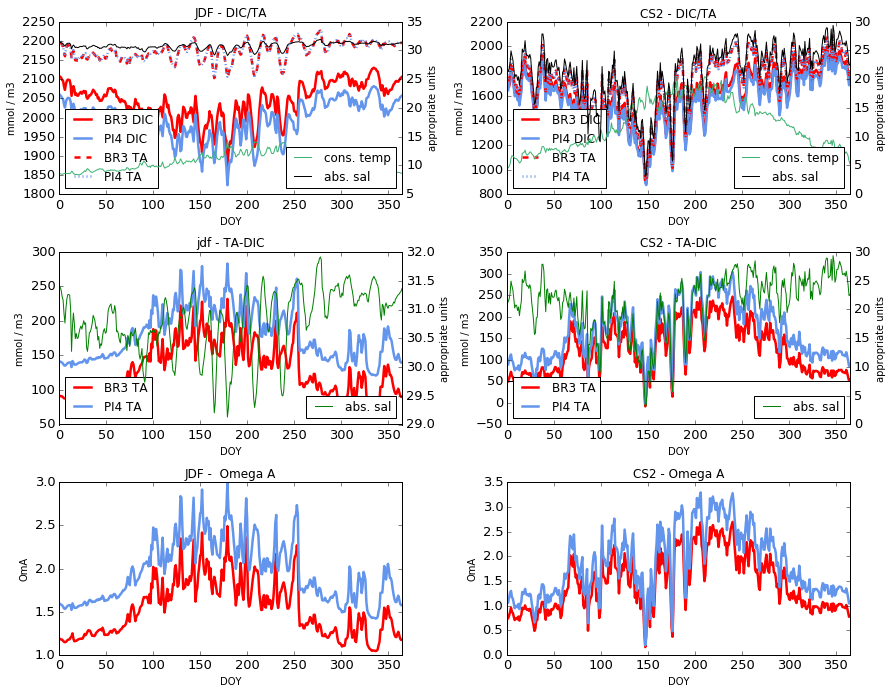

In [12]:
fact = 1.25
fig = plt.figure(figsize=(10*fact,10*fact))

lw = 2.5
days_in = np.arange(1,366,1)


#JDF
ax1 = fig.add_subplot(4,2,1)
ax1.set_title('JDF - DIC/TA')
ax1b = ax1.twinx()
ax1b.plot(days_in, PI4_temp_jdf_s, color = 'mediumseagreen', label = 'cons. temp')
ax1b.plot(days_in, PI4_sal_jdf_s, color = 'black', label = 'abs. sal')
ax1.plot(days_in, BR3_DIC_jdf_s*1000, color = 'red', linewidth = lw, label = 'BR3 DIC')
ax1.plot(days_in, PI4_DIC_jdf_s*1000, color = 'cornflowerblue', linewidth = lw, label = 'PI4 DIC')
ax1.plot(days_in, BR3_TA_jdf_s*1000, color = 'red', linewidth = lw, linestyle = '--', label = 'BR3 TA')
ax1.plot(days_in, PI4_TA_jdf_s*1000, color = 'cornflowerblue', linewidth = lw, linestyle = ':', label = 'PI4 TA')
ax1.set_xlim(0,365)
ax1b.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')
ax1.set_xlabel('DOY')
ax1.set_ylabel('mmol / m3')
ax1b.set_ylabel('appropriate units')

ax1 = fig.add_subplot(4,2,2)
ax1.set_title('CS2 - DIC/TA')
ax1b = ax1.twinx()
ax1b.plot(days_in, PI4_temp_cs2_s, color = 'mediumseagreen', label = 'cons. temp')
ax1b.plot(days_in, PI4_sal_cs2_s, color = 'black', label = 'abs. sal')
ax1.plot(days_in, BR3_DIC_cs2_s*1000, color = 'red', linewidth = lw, label = 'BR3 DIC')
ax1.plot(days_in, PI4_DIC_cs2_s*1000, color = 'cornflowerblue', linewidth = lw, label = 'PI4 DIC')
ax1.plot(days_in, BR3_TA_cs2_s*1000, color = 'red', linewidth = lw, linestyle = '--', label = 'BR3 TA')
ax1.plot(days_in, PI4_TA_cs2_s*1000, color = 'cornflowerblue', linewidth = lw, linestyle = ':', label = 'PI4 TA')
ax1.set_xlim(0,365)
ax1b.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')
ax1.set_xlabel('DOY')
ax1.set_ylabel('mmol / m3')
ax1b.set_ylabel('appropriate units')


ax1 = fig.add_subplot(4,2,3)
ax1.set_title('jdf - TA-DIC')
ax1b = ax1.twinx()
ax1b.plot(days_in, PI4_sal_jdf_s, color = 'green', label = 'abs. sal')
ax1.plot(days_in, BR3_TA_jdf_s*1000-BR3_DIC_jdf_s*1000, color = 'red', linewidth = lw, linestyle = '-', label = 'BR3 TA')
ax1.plot(days_in, PI4_TA_jdf_s*1000-PI4_DIC_jdf_s*1000, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'PI4 TA')
ax1.axhline(y = 50, color = 'black')
ax1.set_xlim(0,365)
ax1b.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')
ax1.set_xlabel('DOY')
ax1.set_ylabel('mmol / m3')
ax1b.set_ylabel('appropriate units')

ax1 = fig.add_subplot(4,2,4)
ax1.set_title('CS2 - TA-DIC')
ax1b = ax1.twinx()
ax1b.plot(days_in, PI4_sal_cs2_s, color = 'green', label = 'abs. sal')
ax1.plot(days_in, BR3_TA_cs2_s*1000-BR3_DIC_cs2_s*1000, color = 'red', linewidth = lw, linestyle = '-', label = 'BR3 TA')
ax1.plot(days_in, PI4_TA_cs2_s*1000-PI4_DIC_cs2_s*1000, color = 'cornflowerblue', linewidth = lw, linestyle = '-', label = 'PI4 TA')
ax1.axhline(y = 50, color = 'black')
ax1.set_xlim(0,365)
ax1b.legend(loc = 'lower right')
ax1.legend(loc = 'lower left')
ax1.set_xlabel('DOY')
ax1.set_ylabel('mmol / m3')
ax1b.set_ylabel('appropriate units')

ax1 = fig.add_subplot(4,2,5)
ax1.set_title('JDF -  Omega A') 
ax1.plot(days_in, OmegaA_BR3_jdf, color = 'red', linewidth = lw, label = 'BR3 OmA')
ax1.plot(days_in, OmegaA_PI4_jdf, color = 'cornflowerblue', linewidth = lw, label = 'PI4 OmA')
ax1.set_xlim(0,365)
ax1.set_xlabel('DOY')
ax1.set_ylabel('OmA')

ax1 = fig.add_subplot(4,2,6)
ax1.set_title('CS2 - Omega A') 
ax1.plot(days_in, OmegaA_BR3_cs2, color = 'red', linewidth = lw, label = 'BR3 OmA')
ax1.plot(days_in, OmegaA_PI4_cs2, color = 'cornflowerblue', linewidth = lw, label = 'PI4 OmA')
ax1.set_xlim(0,365)
ax1.set_xlabel('DOY')
ax1.set_ylabel('OmA')

plt.tight_layout()

In [30]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depth = w['gdept_1d'][:]
depth_broad = np.zeros([40,365])
for i in range(0,365):
    depth_broad[:,i] = depth

dbr = np.ravel(depth_broad)

(-50, 350)

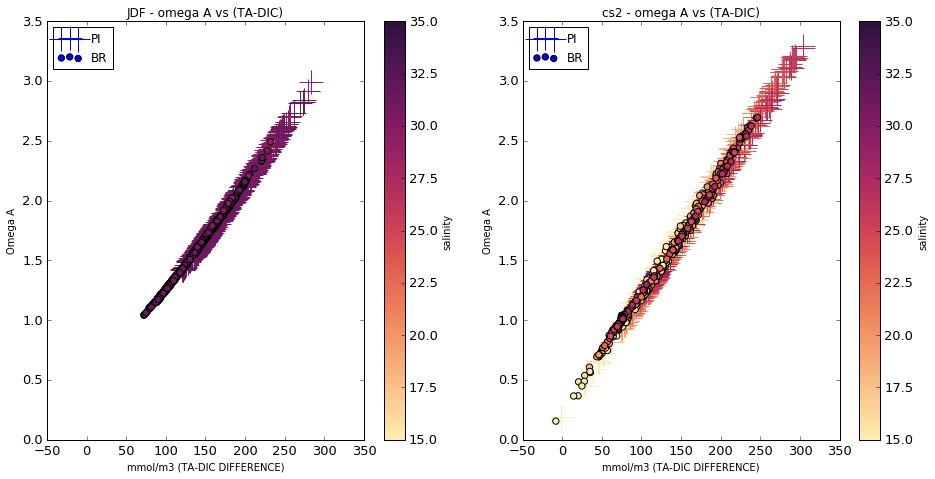

In [37]:
fact = 1.25
fig = plt.figure(figsize=(12.5*fact,6*fact))
ms = 9
tcmap = cm.matter

lw = 2.5
days_in = np.arange(1,366,1)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title('JDF - omega A vs (TA-DIC)') 

x = (PI4_TA_jdf_s-PI4_DIC_jdf_s)*1000
y = OmegaA_PI4_jdf
t_ph = PI4_sal_jdf_s
plt.scatter(x,y,c=t_ph, s = 600,marker = '+', vmin=15, vmax = 35, cmap = tcmap, label = 'PI')


x = (BR3_TA_jdf_s-BR3_DIC_jdf_s)*1000
y = OmegaA_BR3_jdf
t_ph = BR3_sal_jdf_s

tcmap = cm.matter
plt.scatter(x,y,c=t_ph, s = 40, vmin=15, vmax = 35, cmap = tcmap, label = 'BR')

plt.colorbar(label = 'salinity')

plt.legend(loc = 'upper left')
ax1.set_ylabel('Omega A')
ax1.set_xlabel('mmol/m3 (TA-DIC DIFFERENCE)')
ax1.set_ylim([0,3.5])
ax1.set_xlim([-50,350])

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('cs2 - omega A vs (TA-DIC)') 

x = (PI4_TA_cs2_s-PI4_DIC_cs2_s)*1000
y = OmegaA_PI4_cs2
t_ph = PI4_sal_cs2_s
plt.scatter(x,y,c=t_ph, s = 600,marker = '+', vmin=15, vmax = 35, cmap = tcmap, label = 'PI')


x = (BR3_TA_cs2_s-BR3_DIC_cs2_s)*1000
y = OmegaA_BR3_cs2
t_ph = BR3_sal_cs2_s


plt.scatter(x,y,c=t_ph, s = 40, vmin=15, vmax = 35, cmap = tcmap, label = 'BR')

plt.colorbar(label = 'salinity')

plt.legend(loc = 'upper left')
ax1.set_ylabel('Omega A')
ax1.set_xlabel('mmol/m3 (TA-DIC DIFFERENCE)')
ax1.set_ylim([0,3.5])
ax1.set_xlim([-50,350])


(-50, 350)

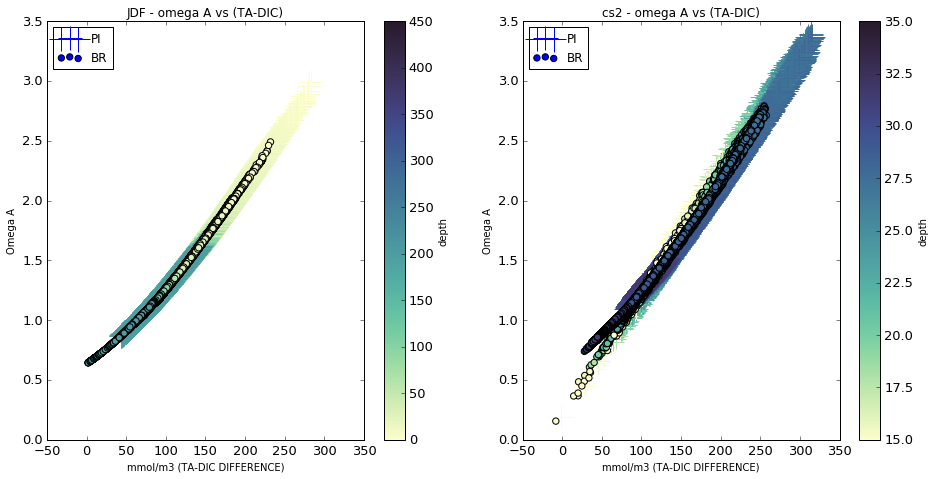

In [36]:
fact = 1.25
fig = plt.figure(figsize=(12.5*fact,6*fact))
ms = 9
tcmap = cm.matter

lw = 2.5
days_in = np.arange(1,366,1)

ax1 = fig.add_subplot(1,2,1)
ax1.set_title('JDF - omega A vs (TA-DIC)') 

x = (PI4_TA_jdf_fc-PI4_DIC_jdf_fc)*1000
y = OmegaA_PI4_jdf_fc
t_ph = dbr
tcmap = cm.deep
plt.scatter(x,y,c=t_ph, s = 600,marker = '+', vmin=0, vmax = 450, cmap = tcmap, label = 'PI')


x = (BR3_TA_jdf_fc-BR3_DIC_jdf_fc)*1000
y = OmegaA_BR3_jdf_fc
t_ph = dbr

plt.scatter(x,y,c=t_ph, s = 40, vmin=0, vmax = 450, cmap = tcmap, label = 'BR')

plt.colorbar(label = 'depth')

plt.legend(loc = 'upper left')
ax1.set_ylabel('Omega A')
ax1.set_xlabel('mmol/m3 (TA-DIC DIFFERENCE)')
ax1.set_ylim([0,3.5])
ax1.set_xlim([-50,350])

ax1 = fig.add_subplot(1,2,2)
ax1.set_title('cs2 - omega A vs (TA-DIC)') 

x = (PI4_TA_cs2_fc-PI4_DIC_cs2_fc)*1000
y = OmegaA_PI4_cs2_fc
t_ph = PI4_sal_cs2_fc
plt.scatter(x,y,c=t_ph, s = 600,marker = '+', vmin=15, vmax = 35, cmap = tcmap, label = 'PI')


x = (BR3_TA_cs2_fc-BR3_DIC_cs2_fc)*1000
y = OmegaA_BR3_cs2_fc
t_ph = BR3_sal_cs2_fc


plt.scatter(x,y,c=t_ph, s = 40, vmin=15, vmax = 35, cmap = tcmap, label = 'BR')

plt.colorbar(label = 'depth')

plt.legend(loc = 'upper left')
ax1.set_ylabel('Omega A')
ax1.set_xlabel('mmol/m3 (TA-DIC DIFFERENCE)')
ax1.set_ylim([0,3.5])
ax1.set_xlim([-50,350])
